# **CatBoost Algorithm**
CatBoost is a state-of-the-art open-source gradient boosting on decision trees library.
- It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies.
- It is in Python and it is designed to be integrated in data science pipelines.
- It provides state-of-the-art results and it is powerful in handling categorical features.
- Do we need to encode categorical features before training the model?" No, CatBoost does not require it."
- It is efficient. It provides a fast and scalable multi-threaded implementation of the algorithm.
- It provides powerful visualization tools to understand the model.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# data import titanic
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# impute missing values using knn imputers in age
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['age'] = imputer.fit_transform(df[['age']])

# impute embarked missing values using pandas
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
# drop deck column
df.drop('deck', axis=1, inplace=True)

# df missing values
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [14]:
df = df.drop('alive',axis=1)

In [15]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
# add this as a new column in the dataframe
df[categorical_cols] = df[categorical_cols].astype('category')

In [16]:
# split data into X and y
X = df.drop('survived', axis=1)
y = df['survived']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Accuracy Score: 0.820627802690583
Confusion Matrix: 
 [[119  15]
 [ 25  64]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       134
           1       0.81      0.72      0.76        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



Text(0.5, 1.0, 'Confusion Matrix')

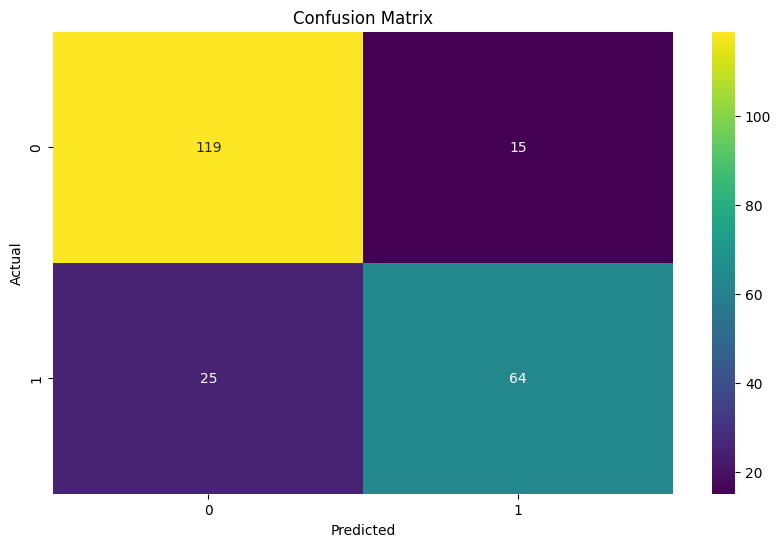

In [17]:
cb = CatBoostClassifier(iterations=100,learning_rate=0.01,loss_function='Logloss',eval_metric='Accuracy',random_seed=42,verbose=False)
cb.fit(X_train, y_train, cat_features=categorical_cols.tolist())

# predictions
y_pred = cb.predict(X_test)

# evaluate the model
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}')
print(f'Classification Report: \n {classification_report(y_test, y_pred)}')

# plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# **Feature Importance**

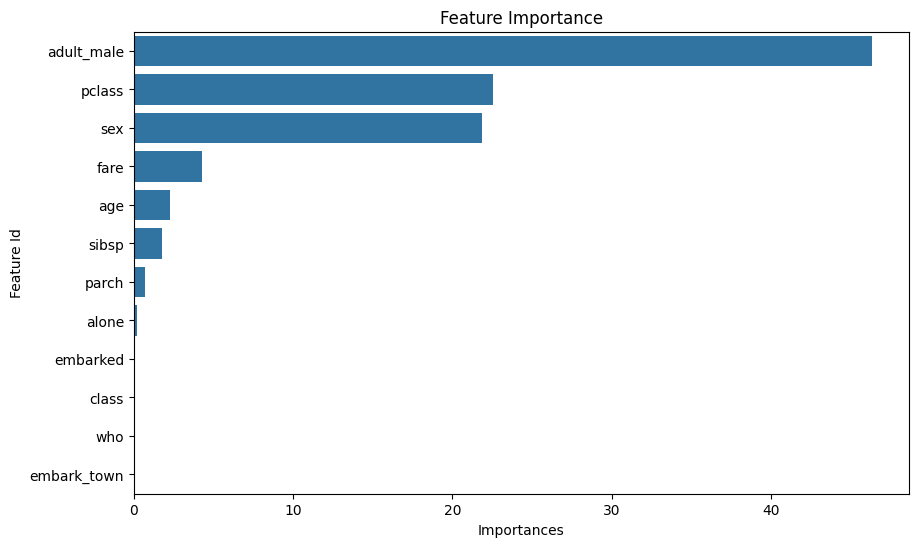

In [18]:

# feature importance
feature_importance = cb.get_feature_importance(prettified=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importances', y='Feature Id', data=feature_importance)
plt.title('Feature Importance')
plt.show()